# Interrogating Training Data

As a tester, it is very important to look at training data as well as the predictions of a model.

##### Why should someone in solutions assurance care about checking training data?

- Being able to check the training data of a model is a key way to spot any flaws in the data
- Flaws in the training data will be reflected in the predictive model.
- Models may make incorrect predictions based on bad quality training data. 

One particular method we can use to check the training data is to look at **correlation** between variables.

#### Why do we care about correlation?

 - Highly correlated variables essentially contain the same information.

 - When this happens, it becomes difficult for the model to distinguish the individual effects of each variable during training. This can lead to unstable and unreliable predictions.

 - Highly correlated variables can dominate the machine learning model.

 - Data Scientists often remove highly correlated variables, this ensure that each  variable contributes unique and independent information to the model, allowing for more accurate and reliable predictions.

 - However, we can't assume data scientists always do this! So it is important to check for ourselves.

We have just been given the training data for a regression model that predicts the diabetic progression of an individual. The data scientist claims he checked the training data before making the model, but we want to be sure! 

In [46]:
from sklearn.datasets import load_diabetes

# Here, we load the diabetes inputs and outputs using the load diabetes function. 

# Earlier we used clear variables named breast_cancer_inputs and breast_cancer_outputs.

# Sadly, data scientists often like to be more concise (and confusing), and like to use X and y.
# You will likely see this a lot online, so it is good to practice this notation. 

diabetes_X, diabetes_y = load_diabetes(return_X_y=True, as_frame=True)
# Here diabetes_X represents inputs, and diabetes_y represents outputs.

Let's have a look at the training data.

In [47]:
display(diabetes_X)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Correlation Matrix

In [40]:
corr = diabetes_X.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


![image](.//task.png)

This correlation plot shows the correlation between each variable/column.
- Values close to 1 show high positive correlation.
- Values close to -1 show high negative correlation.


**Looking at this plot, which 2 columns show the highest correlation?**

As a tester, you may want to report this finding back to the developers.

A data scientist would often remove columns that are highly correlated.

In the code below, remove one of the columns to reduce highly correlated features. 

In [45]:
#remove a column
#diabetes_X = diabetes_X.drop("put_the_name_of_a_column_here", axis=1)
#check the column is removed
display(diabetes_X)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Is there anything else looking a bit odd with this data? Maybe you have noticed that the `sex` values are either 0.050680 or -0.044642?

That could be a bit odd, let's do some exploring.

In [57]:
sex_value_counts = diabetes_X["sex"].value_counts()
print(sex_value_counts)

-0.044642    235
 0.050680    207
Name: sex, dtype: int64


In this case, it all looks pretty normal. Firstly, there are only 2 values, which is a good sign! Secondly, it is normal for data scientists to apply transformations to training data to make it all a similar size, i.e. between 1 and -1. In this case, there doesn't seem to be a problem with the data, but it is always a good idea to keep your eyes peeled on training data!

In [29]:
from sklearn.model_selection import train_test_split

# The following function splits our data randomly to test and training data.
X_training, X_testing, y_training, y_testing = train_test_split(diabetes_X, diabetes_y, train_size=0.8)


Next up, some even more familiar steps! It really is this easy with sklearn.

![image](.//task.png)

An incredibly useful skill in machine learning is being able to use multiple models, and compare their effectiveness. 
For the following example, find another regression model and follow the same steps. 

You can find other models here: https://scikit-learn.org/stable/supervised_learning.html



In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

regression_model_1 = LinearRegression()
# regression_model_2 = <your_model_here>

regression_model_1.fit(X_training,y_training)
# regression_model_2.fit(<what goes in here?>)

LinearRegression()

In [31]:
y_predictions_1 = regression_model_1.predict(X_testing)
#y_predictions_2 = <what goes here?>

So we have our predictions, like last time - we want to know how well we have actually done! 

Let us start first with the mean absolute percentage error from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html

Here, a value of 0 is a perfect prediction, with larger values resulting in worse predictions. 

In [32]:
from sklearn.metrics import mean_absolute_percentage_error

mape1 = mean_absolute_percentage_error(y_testing, y_predictions_1)
#mape2 = mean_absolute_percentage_error(y_testing, y_predictions_2)

print(f"Mean Absolute Percentage Error for model 1: {mape1:.2f}")
#print(f"Mean Absolute Percentage Error for model 2: {mape2:.2f}")

Mean Absolute Percentage Error for model 1: 0.35


Interesting, but this still doesn't tell us much. 

First let us plot the predicted values against the actual values for diabetes progression.

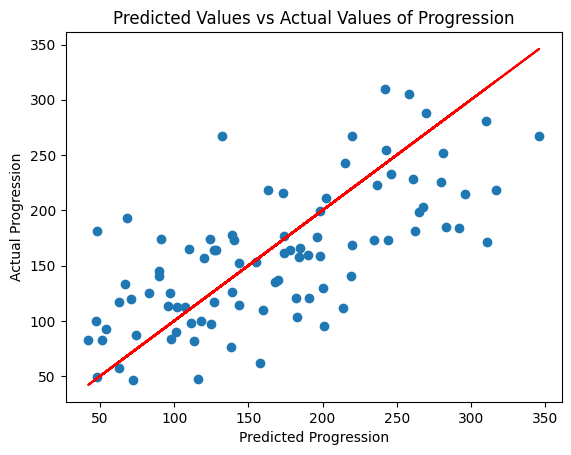

In [34]:
plot_regression_scatter(y_testing,y_predictions_1)

In [ ]:
#plot_regression_scatter(y_testing,y_predictions_2)

What does this plot show us? Well for a start - our predictions don't look great. Only a few points lie on the red line (a perfect prediction).

Let us create another plot, this time called a Kernel Density Plot. This provides an estimate of the probability density function of the data. In simpler terms, it shows how likely different values are to occur within the dataset.

In [35]:
import seaborn as sns

def plot_kernel_density(actual,pred):
    """Creates Kernel Density Estimation plot

    Args:
        actual: the actual regression values
        pred: the predicted regression values

    Returns:
        None
    """
    
    plt.figure(figsize=(10, 7))
    # Kernel Density Estimation plot
    ax = sns.kdeplot(actual, color="r", label="Actual Value") #actual values
    sns.kdeplot(pred, color="b", label="Predicted Values", ax=ax) #predicted values

    plt.title('Actual vs Precited values')
    plt.legend()
    plt.show()

    return None

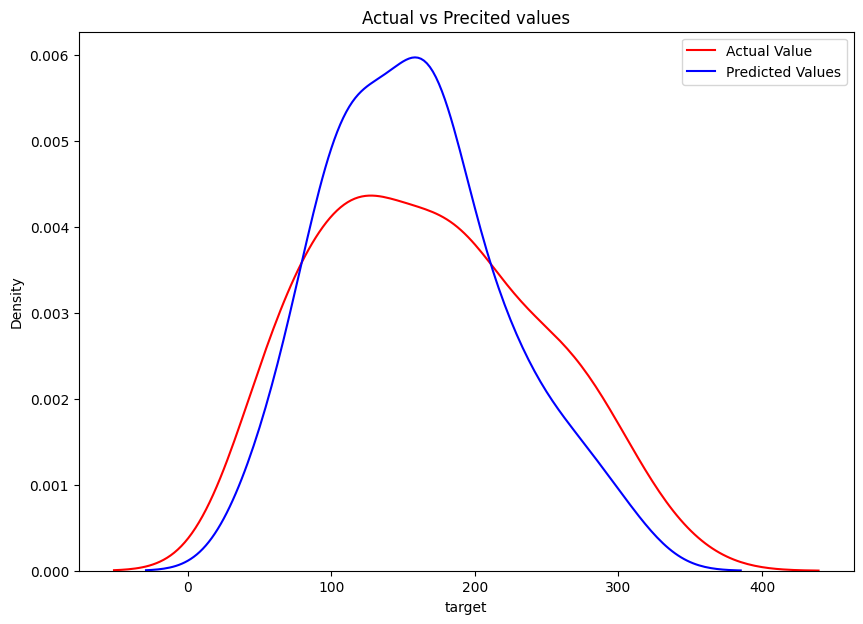

In [36]:
plot_kernel_density(y_testing,y_predictions_1)

In [ ]:
#plot_kernel_density(y_testing,y_predictions_2)

### Good job getting this far!

![image](.//task.png)

You're clearly becoming a bit of an expert now. What other metrics are there to compare each model? 

Hint - here is a good website https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/

Find **atleast** 1 other metric and implement it into this notebook to further compare your models. 

In [ ]:
# Your code here

### Unsupervised vs Supervised Learning

**Supervised learning** is a machine learning approach where the algorithm learns from labeled training data. The training data consists of input features (also called independent variables) and their corresponding known output labels (also called dependent variables or target variables). The goal of supervised learning is to learn a mapping function that can predict the correct output label for new, unseen input data. In other words, the algorithm learns from examples where the desired outcome is already known.

**Unsupervised Learning**
Unsupervised learning, on the other hand, is a machine learning approach where the algorithm learns from unlabeled data. Unlike supervised learning, there are no predefined output labels or target variables in unsupervised learning. The algorithm's objective is to find patterns, structures, or relationships within the data without any prior knowledge of the outcomes. Unsupervised learning algorithms attempt to uncover hidden patterns, group similar data points together, or reduce the dimensionality of the data without being guided by explicit labels.

In summary, supervised learning uses labeled data to learn the relationship between input features and output labels, whereas unsupervised learning works with unlabeled data to discover patterns or structures in the data without any predefined target variables.

![image](.//task.png)

So far we have only used one type of supervised/unsupervised learning - can you tell which one we used?

Our next task will use a clustering algorithm. This is a type of... ah I almost gave the answer to the above question!

In the below code, some data has been generated using the `make_blobs` function. 

This has created some data in 'clusters'. The task - can you use a clustering algorithm to group this data?

This may help - https://scikit-learn.org/stable/modules/clustering

Now, you may be thinking that this looks like a classification problem, and you would be correct, you could solve this using a classification model. However, as we are investigating unsupervised learning, we want to complete this task without using the output values / y values! 

A graph has been created so that you can analyse the input data, but once you have had a look, try not to use the y values again! You may wish to steal some code from the below plot to analyse your results later though!

In [119]:
from sklearn.datasets import make_blobs

# Use the make_blobs function to generate inputs and outputs
X, y = make_blobs(n_samples=2000, centers=5, n_features=3, random_state=1, cluster_std = 1)

In [120]:
# The following code helps visualise the initial data. 

# Turn X into a dataframe 
X = pd.DataFrame(X).astype(float)

# Create a dictionary to add colours to the plot
colours_dict = {
    0:"red",
    1:"blue",
    2:"green",
    3:"orange",
    4:"purple",
    5:"black"
}
# Iterate through the outputs to create an array of colours
colour_map = [colours_dict[int(num)] for num in y]


# Create a scatter plot
fig = px.scatter_3d(X,x=0,y=1,z=2,color=colour_map)

# Update the graphics
fig.update_traces(marker=dict(size = 4,
                              line=dict(width=2,color='DarkSlateGrey')),
                              selector=dict(mode='markers'))

In [ ]:
# Your code here - good luck!